In [1]:
import os
import cv2
import PIL
import numpy as np
import matplotlib.pyplot as plt
import spacy
from spacy import displacy
import easyocr

/home/aman/anaconda3/lib/python3.10/site-packages/torch/cuda/__init__.py:107: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0
2023-06-05 13:04:41.623878: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-05 13:04:42.259583: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-06-05 13:04:43.113472: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2023-06-

In [2]:
pwd

'/home/aman/Documents/Tally/DocumentAI'

In [3]:
os.chdir("/home/aman/Documents/Tally/DocumentAI/samples/images/PreProcessedImages/")

In [52]:
imagePath = os.listdir()[3]

In [53]:
image = cv2.imread(imagePath)

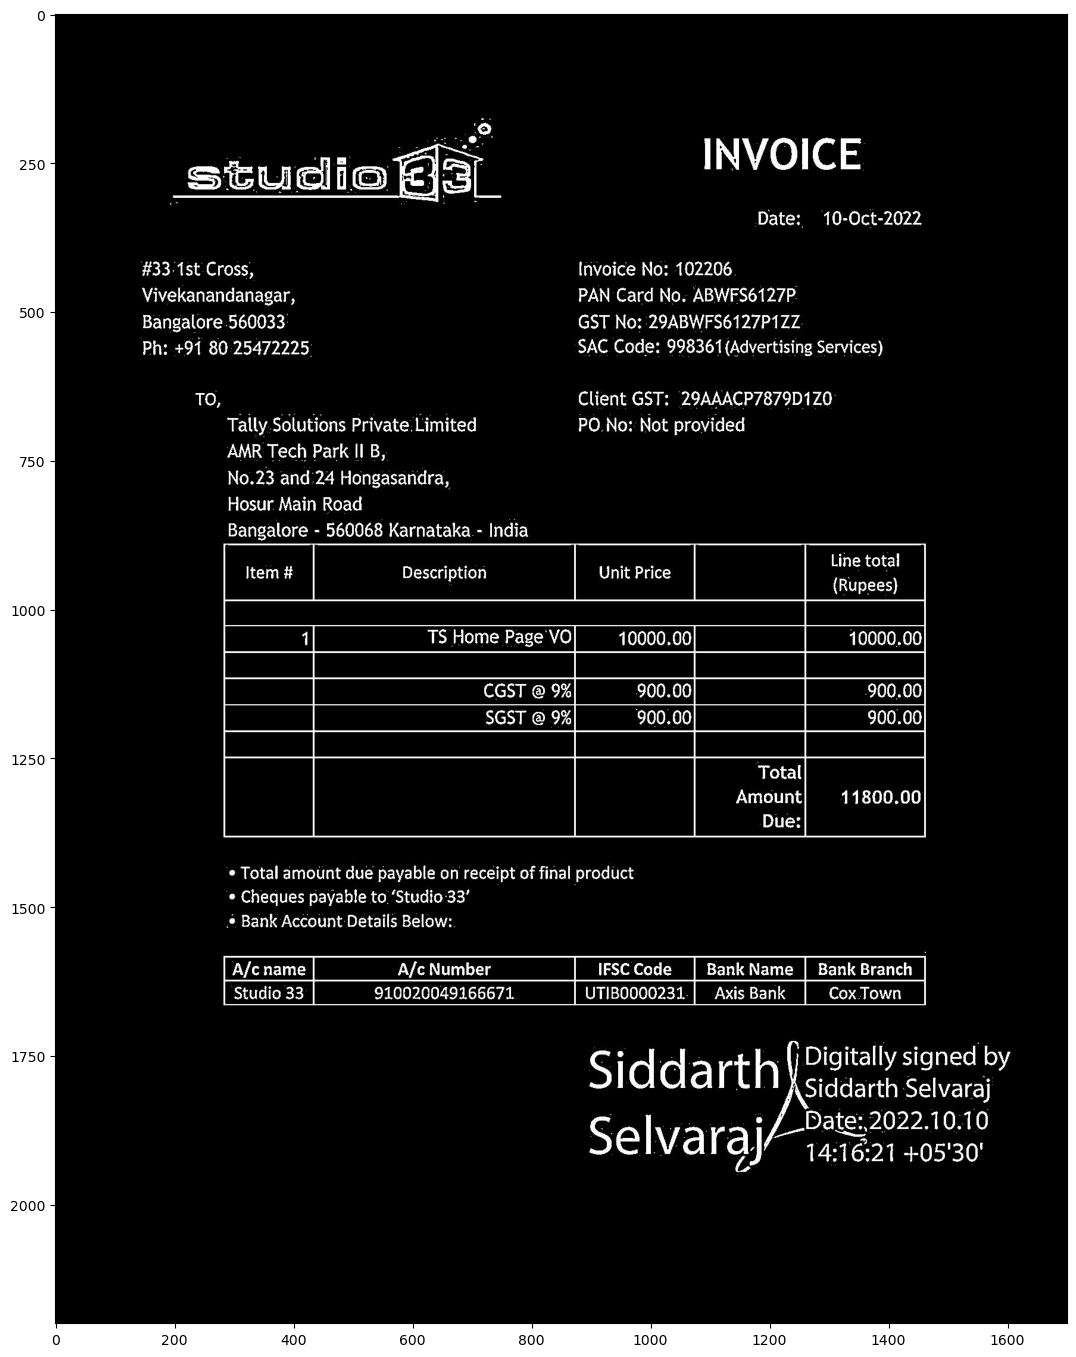

In [54]:
plt.figure(figsize=(22, 17))
plt.imshow(image)

In [55]:
reader = easyocr.Reader(["en"], gpu=False)

Using CPU. Note: This module is much faster with a GPU.


In [56]:
result = reader.readtext(imagePath, paragraph=False)

In [57]:
Y = image.shape[0]
X = image.shape[1]

In [58]:
zone1 = [(0, 0), (Y/2, X)]
zone2 = [(Y/2, 0), (Y, X)]

In [59]:
print(zone1, zone2)

[(0, 0), (1100.0, 1700)] [(1100.0, 0), (2200, 1700)]


In [60]:
dict = {}
data = ""

In [61]:
for detection in result:
    text = detection[1]
    data+=text
    positions = detection[0]
    x = [x[0] for x in positions]
    y = [x[1] for x in positions]
    position = [(min(x), max(x)), (min(y), max(y))]
    dict[text]=position
    

In [62]:
nlpModel = spacy.load("en_core_web_lg")

In [63]:
document = nlpModel(data)

In [67]:
displacy.render(document, jupyter=True, style="ent")

In [65]:
dict

{'INVOICE': [(1080, 1362), (198, 272)],
 'Studioba': [(214, 761), (218, 322)],
 'Date:': [(1175, 1261), (325, 361)],
 '10-Oct-2022': [(1285, 1461), (325, 361)],
 '#33 1st Cross,': [(141, 339), (410, 449)],
 'Invoice No: 102206 .': [(873, 1145), (411, 447)],
 'Vivekanandanagar,': [(140, 411), (451, 496)],
 'PAN Card No: ABWFS6127P': [(875, 1252), (455, 491)],
 'Bangalore 560033': [(143, 398), (499, 541)],
 'GST No: 29ABWFS612ZP1ZZ:': [(875, 1259), (497, 537)],
 'Ph: +91 80 25472225.': [(143, 435), (541, 579)],
 'SAC Code: 998361(Advertising Services)': [(873, 1397), (539, 581)],
 'TO,': [(233, 285), (631, 667)],
 'Client GST: 29AAACP7879D1ZO': [(875, 1311), (627, 665)],
 'Solutions Private Limited': [(361, 713), (669, 709)],
 'PO.No: Not provided': [(875, 1166), (668, 713)],
 'AMR Tech Park II B,': [(285, 563), (717, 755)],
 'No.23 and 24 Hongasandra,': [(285, 669), (761, 803)],
 'Hosur Main Road': [(285, 523), (805, 841)],
 'Bangalore': [(284, 431), (847, 892)],
 '560068 Karnataka': [(